# Prática I - Redes Neurais usando Python

## I. Introduction


### A. Overview of PyTorch
PyTorch is an open-source machine learning library for Python that was released by Facebook's AI research team. It is widely used for building and training neural networks and provides a high-level interface for building models. PyTorch is known for its dynamic computational graph, which allows for easier debugging and faster development of neural networks. It also has strong support for GPU acceleration, making it well-suited for deep learning applications.

### B. Why Python is a good choice for PyTorch
Python is one of the most popular programming languages for data science and machine learning. It is easy to learn, has a large and supportive community, and has many powerful libraries for scientific computing, such as NumPy, Pandas, and Matplotlib. Python's simplicity and readability make it an ideal language for writing code that is easy to understand and maintain. PyTorch is written in Python, and its API is designed to be intuitive and easy to use.

### C. Course objectives
The objective of this course is to provide an overview of Python programming language and its use in PyTorch. By the end of this lecture, you should have a basic understanding of Python syntax, as well as NumPy, Pandas, and PyTorch libraries. This knowledge will prepare you to write your own neural network models using PyTorch in subsequent lectures.

## II. Python Basics

### A. Variables and Data Types
Variables are used to store data in a program. In Python, variables can be assigned different types of data such as integers, floats, strings, and booleans. Python is dynamically typed, which means that the type of a variable is inferred at runtime based on the data assigned to it.



### B. Control Structures
Control structures are used to control the flow of execution in a program. In Python, the if statement is used to perform a conditional test, and the for and while loops are used to repeat a block of code. The break and continue statements are used to modify the behavior of loops.

### C. Functions
Functions are blocks of code that can be reused throughout a program. In Python, functions are defined using the def keyword, followed by the function name, and the function parameters in parentheses. A function can return a value using the return keyword.

### D. Classes 

This course isn't intended to present all Python fundamentals, but `Class` will definitely help us to create a better code. 

In [1]:
class Person:
    def __init__(self, name, age):
        self.name = name 
        self.age = age 

    def __str__(self):
        return f'{self.name}, {self.age}'
    
    def greetings(self, visitant):
        print(f'Greetings, {visitant}. My name is {self.name}')
    
person1 = Person('Thiago','28') 
print(person1)
person1.greetings('Luke')

Thiago, 28
Greetings, Luke. My name is Thiago


We can heritage some objects. 

In [2]:
class Student(Person):
    def __init__(self, name, age, course):
        super().__init__(name, age)
        self.course = course 

    def __str__(self):
        return f'{self.name}, {self.age}, {self.course}' 
    

student1 = Student('Thiago','28','Neural networks') 
print(student1)
student1.greetings('Luke')

Thiago, 28, Neural networks
Greetings, Luke. My name is Thiago


In this course, we will this use this artefact in two ocasions:

- Building the Neural Network 

- Building the torch Dataset

### D. Importing Libraries
Python has a rich ecosystem of libraries that can be used for scientific computing, machine learning, and data analysis. To use a library in a program, it must be imported using the import statement. For example, the NumPy library can be imported using the statement import numpy.

In [3]:
import torch
import torch.nn as nn   #Definicao da rede neural
from torch.utils.data import Dataset, DataLoader  #utilidade para dataset

from tqdm.notebook import tqdm

from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

import pandas as pd 

d:\thiago\phd\gradvec\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## III. Pandas Basics

### A. Introduction to Pandas
Pandas is a Python library that provides data manipulation and analysis tools. It is built on top of NumPy and provides powerful data structures such as Series and DataFrame.


### B. Loading Data
Pandas provides many functions for loading data from various sources such as CSV files, Excel files, SQL databases, and JSON files. The most commonly used function is read_csv(), which can read data from a CSV file and create a DataFrame.


In [4]:
# Loading the dataset. 

df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/PUC_Redes_Neurais/main/datasets/iris.csv')

#### Example:

In this example, we will use the Iris dataset, a common benchmark problem for Data Science pratictioners.
The dataset contains 150 registries and 4 attributes (length and width for petals and sepals)

<img src="https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png"/>

Image source: https://www.embedded-robotics.com/iris-dataset-classification/

### C. DataFrame
A DataFrame is a two-dimensional table-like data structure that can hold data of different types. It is similar to a spreadsheet or a database table, where each column represents a variable, and each row represents an observation.


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### D. Data Cleaning
Pandas provides many functions for cleaning and transforming data. Some common data cleaning operations include removing missing values, replacing values, and filtering rows based on conditions.


### E. Data Exploration
Pandas provides many functions for exploring and summarizing data. Some common data exploration operations include computing descriptive statistics, grouping data, and visualizing data.

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby(by='Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [8]:
# Also, we can generate plots (e.g., pandas, matplotlib, seaborn)
import seaborn as sns 

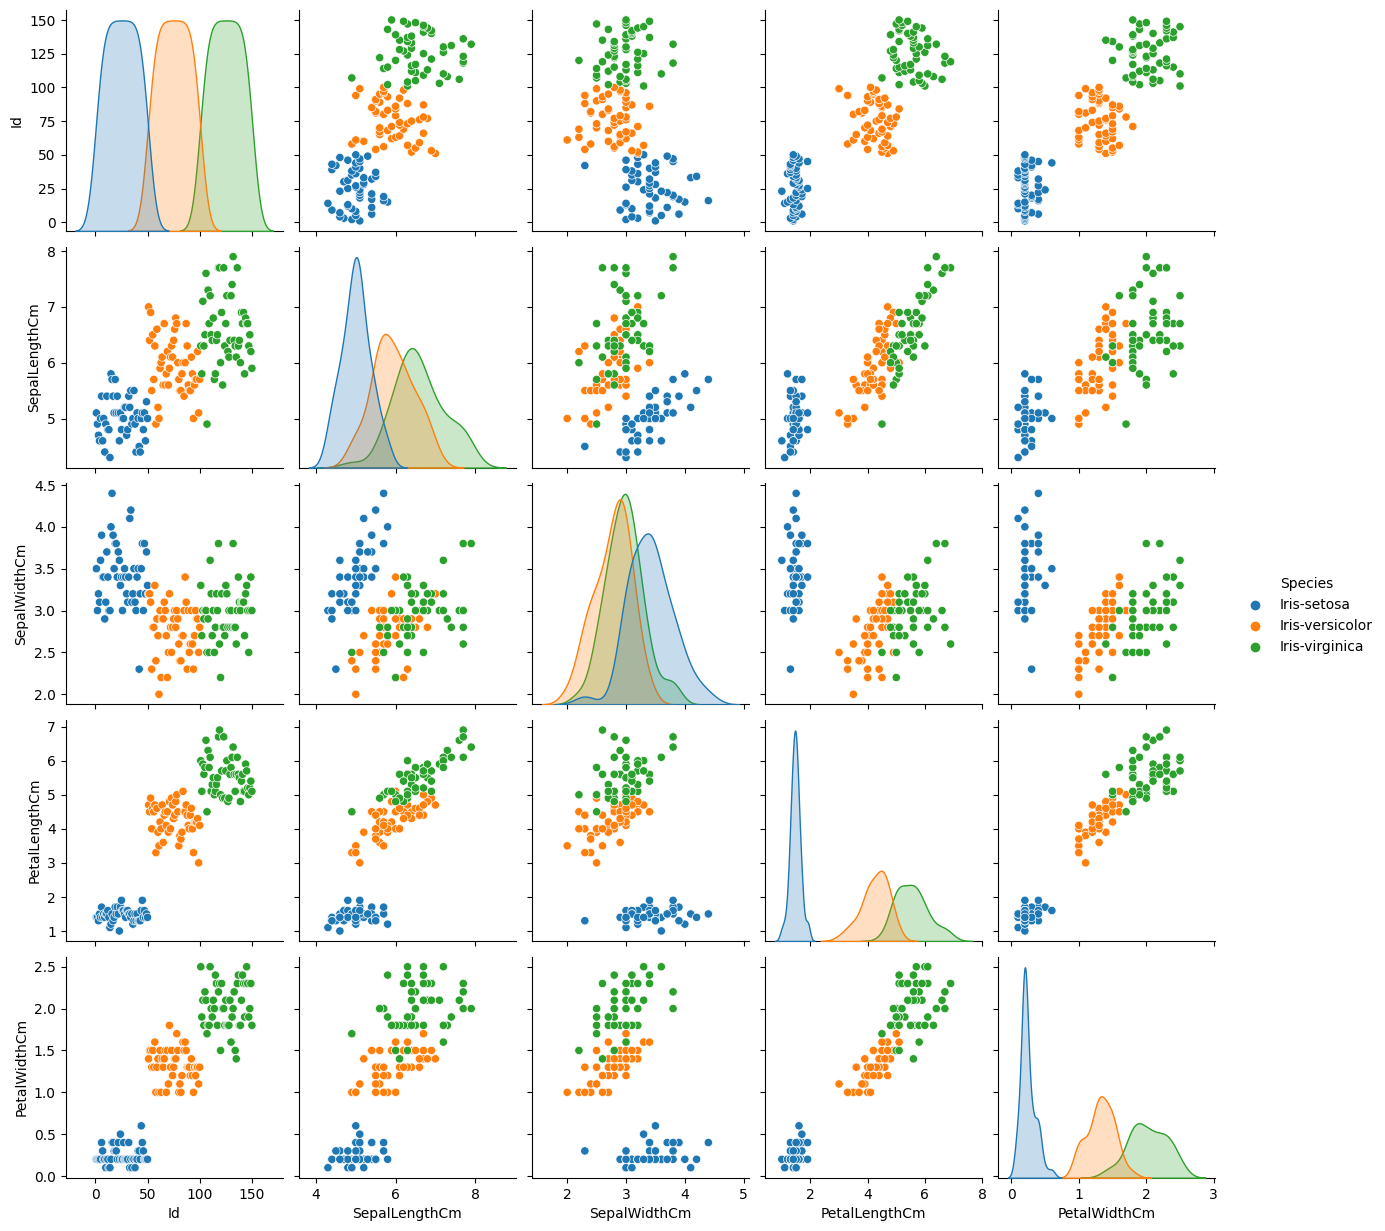

In [9]:
sns.pairplot(df,hue='Species')

## IV. Data preparation with Scikit-Learn

### A. Data split 

In [10]:
y = df['Species'].values

X = df.drop(columns=['Id','Species']).values

In [11]:
# using train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### B. Data normalization

In [12]:
scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train) 

X_test_std = scaler.transform(X_test)

### C. Label encoding

In [13]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train) 

y_test_encoded = encoder.transform(y_test)

### D. Other preprocessing techniques

## V. PyTorch Basics

### A. Tensors
Tensors are the basic building blocks of PyTorch. They are similar to NumPy arrays, but with the added benefit of GPU acceleration. Tensors can be created using the torch.tensor() function, which takes a list or tuple as an argument.

In [14]:
a = torch.tensor([1, 2, 3]) 

### B. Operations on Tensors
PyTorch provides many operations that can be performed on tensors, such as element-wise arithmetic, matrix multiplication, and reduction operations. PyTorch also provides many mathematical functions such as sin(), cos(), and exp(), which can be applied element-wise to a tensor.



In [15]:
b = torch.tensor([0, 1, 0]) 

In [16]:
a * b

tensor([0, 2, 0])

In [17]:
torch.sum(a) 

tensor(6)

In [18]:
torch.max(a)

tensor(3)

### C. Neural Networks
PyTorch provides a high-level interface for building neural networks, through the torch.nn module. Neural networks can be defined as a sequence of layers, where each layer performs a specific operation on the input data. PyTorch also provides many pre-defined layers, such as convolutional layers and linear layers, that can be used to build complex networks.

In [19]:
# We will use the init to initialize the network layers, and forward to define the propagation. We create a Neural Network like a LEGO. :)

class NeuralNetwork(torch.nn.Module):
  def __init__(self, n_in = 1, n_out = 1, hidden_layer = 1):
    super().__init__()

    self.fc1 = nn.Linear(in_features=n_in, out_features=hidden_layer) 
    self.activation = nn.Sigmoid() 
    self.fc2 = nn.Linear(in_features=hidden_layer, out_features = n_out)
    
  def forward(self,x):
    h1 = self.fc1(x) 
    a1 = self.activation(h1) 
    h2 = self.fc2(a1) 

    return h2 

In [20]:
model = NeuralNetwork(n_in=4, n_out=3, hidden_layer=15)

### D. Optimizers
PyTorch provides several optimizers, such as stochastic gradient descent (SGD) and Adam.

In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

### E. Dataset
In PyTorch, a dataset is an abstract class that represents a collection of data. A dataset can be used to represent any type of data, such as images, text, or audio. To use a dataset in PyTorch, we need to create a custom subclass of the torch.utils.data.Dataset class, and implement the len() and getitem() methods.



In [22]:
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        X_batch = torch.from_numpy(self.X_data[index]).float()
        y_batch = torch.tensor(self.y_data[index]).long()
        return X_batch, y_batch
        
    def __len__ (self):
        return len(self.X_data)


In [23]:
train_dataset = CustomDataset(X_train_std, y_train_encoded)
test_dataset = CustomDataset(X_test_std, y_test_encoded)

### F. Dataloader
A dataloader is a PyTorch utility that allows us to efficiently load data from a dataset. The dataloader can automatically shuffle the data, batch the data into smaller groups, and load the data in parallel using multiple CPU cores. To create a dataloader in PyTorch, we need to pass a dataset object and a batch size to the torch.utils.data.DataLoader class.

In [24]:
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

### G. Autograd
PyTorch has a feature called autograd, which allows for automatic differentiation of tensors. This means that gradients can be computed automatically for tensors that are involved in a computation. This is useful for training neural networks, where gradients are used to update the weights of the network.



## VI. Hands-on PyTorch

### A. Model training

In [25]:
epochs = 100 

loss_function = nn.CrossEntropyLoss()

In [26]:
for e in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        y_hat = model(X_batch) 
        loss = loss_function(y_hat, y_batch) 

        loss.backward() 

        optimizer.step()


    print(f"Epoch [{e+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 1.0350
Epoch [2/100], Loss: 0.8496
Epoch [3/100], Loss: 0.6517
Epoch [4/100], Loss: 0.4785
Epoch [5/100], Loss: 0.3924
Epoch [6/100], Loss: 0.3239
Epoch [7/100], Loss: 0.2676
Epoch [8/100], Loss: 0.2075
Epoch [9/100], Loss: 0.1710
Epoch [10/100], Loss: 0.1367
Epoch [11/100], Loss: 0.1184
Epoch [12/100], Loss: 0.0990
Epoch [13/100], Loss: 0.0877
Epoch [14/100], Loss: 0.0764
Epoch [15/100], Loss: 0.0697
Epoch [16/100], Loss: 0.0629
Epoch [17/100], Loss: 0.0588
Epoch [18/100], Loss: 0.0551
Epoch [19/100], Loss: 0.0525
Epoch [20/100], Loss: 0.0504
Epoch [21/100], Loss: 0.0483
Epoch [22/100], Loss: 0.0470
Epoch [23/100], Loss: 0.0453
Epoch [24/100], Loss: 0.0443
Epoch [25/100], Loss: 0.0428
Epoch [26/100], Loss: 0.0419
Epoch [27/100], Loss: 0.0406
Epoch [28/100], Loss: 0.0397
Epoch [29/100], Loss: 0.0386
Epoch [30/100], Loss: 0.0378
Epoch [31/100], Loss: 0.0368
Epoch [32/100], Loss: 0.0361
Epoch [33/100], Loss: 0.0353
Epoch [34/100], Loss: 0.0347
Epoch [35/100], Loss: 0

### B. Model evaluation

In [27]:
model.eval()
with torch.no_grad():
  X_test_torch = torch.from_numpy(X_test_std).float()
  y_hat = model(X_test_torch)
  y_ = torch.argmax(y_hat.data,dim = 1).numpy()

### C. Evaluation metrics

In [28]:
print(classification_report(y_test_encoded, y_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
cm = confusion_matrix(y_test_encoded, y_)

In [30]:
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

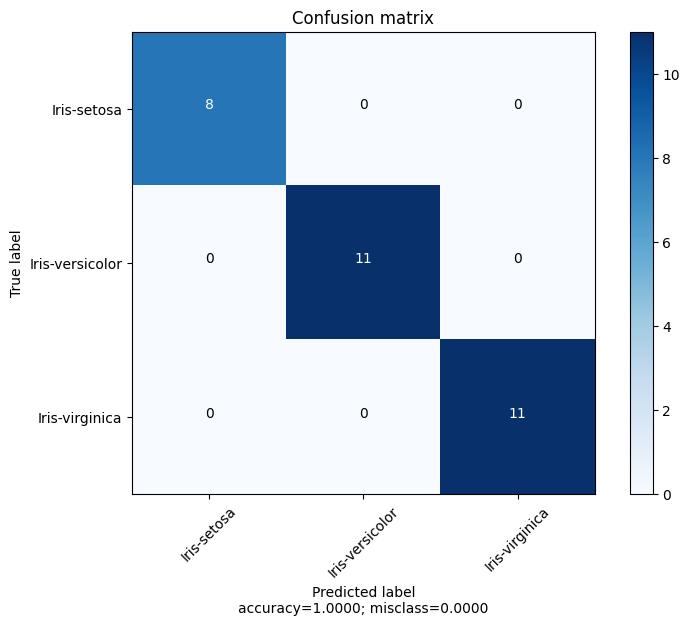

In [37]:
plot_confusion_matrix(cm, encoder.classes_)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)